In [1]:
import pandas as pd # 데이터 구성 패키지 : Series, DataFrame
import numpy as np # 행렬 연산 패키지
import matplotlib # 데이터 시각화 패키지
import matplotlib.pyplot as plt

from scipy import stats # 통계 분석 패키지
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline 
# 그래프 표시

In [2]:
# p217 실습
# 자동차 연비 Data Set에서 기술통계치 구하기
# - 시내에서 연비(mpg) 통계치 : 구동 방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
# - 고속도로에서 연비(mpg) 통계치 : 구동 방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
# data.set : mycars.csv
mycars = pd.read_csv("/home/piai/다운로드/2주차 실습파일/1 Big Data 분석 기초/mycars.csv")
# mycars 데이터 가져오기
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [3]:
mycars.describe().round(1)
# 데이터를 요약하고 소수점 1자리수까지 표현

,displacement,year,cylinder,mpg,highway_mileage
count,234.0,234.0,234.0,234.0,234.0
mean,3.5,2003.5,5.9,16.9,23.4
std,1.3,4.5,1.6,4.3,6.0
min,1.6,1999.0,4.0,9.0,12.0
25%,2.4,1999.0,4.0,14.0,18.0
50%,3.3,2003.5,6.0,17.0,24.0
75%,4.6,2008.0,8.0,19.0,27.0
max,7.0,2008.0,8.0,35.0,44.0


In [4]:
car_oil = mycars[['automatic', 'mpg']]
car_oil
# 자동차 구동별, mpg 데이터 subset해라.

,automatic,mpg
0,auto,18
1,manual,21
2,manual,20
3,auto,21
4,auto,16
...,...,...
229,auto,19
230,manual,21
231,auto,16
232,manual,18


In [5]:
car_oil.groupby('automatic').describe()
# 자동차 구동별 데이터 수 평균 표준편차
# 데이터 수, 평균, 표준편차, min, Q1, Q3-Q1, Q3, max

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [70]:
df = pd.DataFrame({'before' : [68.7, 71.4, 69.8, 75.3, 71.3, 72.7, 66.9, 70.2, 74.4, 70.1], 'after' : [73.4, 77.0, 73.7, 73.3, 73.1, 74.5, 77.5, 76.4, 75.7, 77.1]})
df

,before,after
0,68.7,73.4
1,71.4,77.0
2,69.8,73.7
3,75.3,73.3
4,71.3,73.1
5,72.7,74.5
6,66.9,77.5
7,70.2,76.4
8,74.4,75.7
9,70.1,77.1


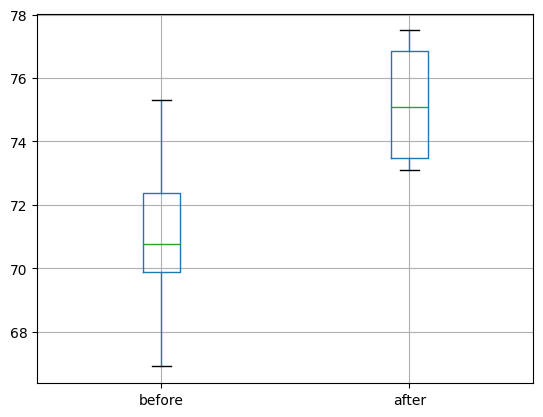

In [71]:
df.boxplot(['before', 'after'])
plt.show()

In [72]:
statistic, p = stats.shapiro(df['before'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = 0.9729754651286565, p-value = 0.916978399513421


In [73]:
statistic, p = stats.shapiro(df['after'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = 0.8721038484378258, p-value = 0.10576471133379112


In [74]:
stats.bartlett(df['before'], df['after'])

BartlettResult(statistic=1.131462856465442, pvalue=0.28746352396763464)

In [76]:
t_result = stats.ttest_ind(df['before'], df['after'])
t_result

TtestResult(statistic=-4.1855686397107235, pvalue=0.0005557548251924057, df=18.0)

In [79]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-sample t_test")
print("t: {}".format(t))
print("p: {}".format(p))

2-sample t_test
t: -4.186
p: 0.001


In [6]:
# p220 [실습]
# 다음 데이터는 자동차의 모델과 연비(mpg)에 대한 자료를 조사한 table이다.
# 이 범주형 변수인 구동방식, 모델에 대해 counts, percents, cumulative counts, 
# cumulative percents를 계산 바랍니다.
# data.set : mycars.csv
cars = pd.read_csv("/home/piai/다운로드/2주차 실습파일/1 Big Data 분석 기초/mycars.csv")
cars : 


,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [7]:
cdf = cars[["automatic", "model"]]
cdf
# 구동방식, 모델 행을 출력

,automatic,model
0,auto,a4
1,manual,a4
2,manual,a4
3,auto,a4
4,auto,a4
...,...,...
229,auto,passat
230,manual,passat
231,auto,passat
232,manual,passat


In [8]:
# 구동방식의 수를 counts 하고 순서대로 정렬
count_auto = cdf['automatic'].value_counts().sort_index()
count_auto

auto      157
manual     77
Name: automatic, dtype: int64

In [9]:
# 구동방식 퍼센트
percent_auto = count_auto / sum(count_auto) * 100
percent_auto

auto      67.094017
manual    32.905983
Name: automatic, dtype: float64

In [10]:
# 구동방식의 누적 카운트
# cumsum() 함수는 배열에서 주어진 축에 따라 누적된 원소들의 누적 합을 계산하는 함수
cumcnt_auto = np.cumsum(count_auto)
cumcnt_auto

auto      157
manual    234
Name: automatic, dtype: int64

In [11]:
# 구동방식의 누적 백분율
cumpct_auto = np.cumsum(percent_auto)
cumpct_auto

auto       67.094017
manual    100.000000
Name: automatic, dtype: float64

In [12]:
# 모델에 대한 값을 순서대로 정렬
count_model = cdf['model'].value_counts().sort_index()
count_model

4runner 4wd                6
a4                         7
a4 quattro                 8
a6 quattro                 3
altima                     6
c1500 suburban 2wd         5
camry                      7
camry solara               7
caravan 2wd               11
civic                      9
corolla                    5
corvette                   5
dakota pickup 4wd          9
durango 4wd                7
expedition 2wd             3
explorer 4wd               6
f150 pickup 4wd            7
forester awd               6
grand cherokee 4wd         8
grand prix                 5
gti                        5
impreza awd                8
jetta                      9
k1500 tahoe 4wd            4
land cruiser wagon 4wd     2
malibu                     5
maxima                     3
mountaineer 4wd            4
mustang                    9
navigator 2wd              3
new beetle                 6
passat                     7
pathfinder 4wd             4
ram 1500 pickup 4wd       10
range rover   

In [13]:
percent_model = count_model / sum(count_model) * 100
percent_model

4runner 4wd               2.564103
a4                        2.991453
a4 quattro                3.418803
a6 quattro                1.282051
altima                    2.564103
c1500 suburban 2wd        2.136752
camry                     2.991453
camry solara              2.991453
caravan 2wd               4.700855
civic                     3.846154
corolla                   2.136752
corvette                  2.136752
dakota pickup 4wd         3.846154
durango 4wd               2.991453
expedition 2wd            1.282051
explorer 4wd              2.564103
f150 pickup 4wd           2.991453
forester awd              2.564103
grand cherokee 4wd        3.418803
grand prix                2.136752
gti                       2.136752
impreza awd               3.418803
jetta                     3.846154
k1500 tahoe 4wd           1.709402
land cruiser wagon 4wd    0.854701
malibu                    2.136752
maxima                    1.282051
mountaineer 4wd           1.709402
mustang             

In [14]:
cumcnt_model = np.cumsum(count_model)
cumcnt_model

4runner 4wd                 6
a4                         13
a4 quattro                 21
a6 quattro                 24
altima                     30
c1500 suburban 2wd         35
camry                      42
camry solara               49
caravan 2wd                60
civic                      69
corolla                    74
corvette                   79
dakota pickup 4wd          88
durango 4wd                95
expedition 2wd             98
explorer 4wd              104
f150 pickup 4wd           111
forester awd              117
grand cherokee 4wd        125
grand prix                130
gti                       135
impreza awd               143
jetta                     152
k1500 tahoe 4wd           156
land cruiser wagon 4wd    158
malibu                    163
maxima                    166
mountaineer 4wd           170
mustang                   179
navigator 2wd             182
new beetle                188
passat                    195
pathfinder 4wd            199
ram 1500 p

In [15]:
cumpct_model = np.cumsum(percent_model)
cumpct_model

4runner 4wd                 2.564103
a4                          5.555556
a4 quattro                  8.974359
a6 quattro                 10.256410
altima                     12.820513
c1500 suburban 2wd         14.957265
camry                      17.948718
camry solara               20.940171
caravan 2wd                25.641026
civic                      29.487179
corolla                    31.623932
corvette                   33.760684
dakota pickup 4wd          37.606838
durango 4wd                40.598291
expedition 2wd             41.880342
explorer 4wd               44.444444
f150 pickup 4wd            47.435897
forester awd               50.000000
grand cherokee 4wd         53.418803
grand prix                 55.555556
gti                        57.692308
impreza awd                61.111111
jetta                      64.957265
k1500 tahoe 4wd            66.666667
land cruiser wagon 4wd     67.521368
malibu                     69.658120
maxima                     70.940171
m

In [16]:
# p233 실습
# 정규분포
# 대한민국 남성의 20~30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm이다. 
# 나의 키가 180cm 일 경우에 나는 몇 % 범위에 위치할까요?

man_mean = 175 # 평균
man_sigma = 5 # 표준편차
x = 180 # 허용범위
prob = stats.norm.cdf(x, man_mean, man_sigma)
result = (1-prob) * 100
result

# 정규분포확률 구하기 및 누적확률밀도분포 그리기
# scipy.stats 패키지
# norm.cdf() 함수 = 누적밀도 함수
# stats.norm.cdf(x, loc, scale)
# (확률변수값, 평균, 표준편차)
# 즉, pob는 scipy 패키지 내 누적밀도 함수 norm.cdf()로 확률변수값, 평균, 표준편차를 기입한다.

15.865525393145708

In [17]:
# 235 실습
# 정규분포
# 어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차가 3km인 정규분포를 이룬다.
# 1) 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가요?
# 2) 1리터를 가지고 15km 이상을 달릴 확률은 얼마인가요?

car_mean = 12
car_sigma = 3
x1 = 15

prob1 = stats.norm.cdf(x1, car_mean, car_sigma)
result1 = (prob1 - 0.5)
result2 = (1-prob) * 100
print(result1)
print(result2)


0.3413447460685429
15.865525393145708


In [18]:
# p241 실습
# t분포
# 확률변수 t는 자유도가 100인 t-분포를 따른다.  t값이 2.0일 때, P(T≤t)을 계산하시오.

t = 2.0
df = 100

prob2 = stats.t.cdf(t, df)
print("P(T<=t): {:3f}".format(prob2))

# stats 패키지의 t.cdf (t값, 자유도)

P(T<=t): 0.975894


In [19]:
# p244 실습
# x2 분포
# 확률변수 x2는 자유도가 8인 x2-분포 를 따른다.
# x2값이 3.0일 때, P(X ≤ x2)을 계산하시오.

chis = 3.0
x = 8

prob3 = stats.chi2.cdf(chis, x)
print("P(X<={0}) : {1:.4f}".format(chis, prob3))

# chisquare tset로 One sample Chisquare test를 사용
# chisquare value를 p-value로 표준화하기

P(X<=3.0) : 0.0656


In [20]:
# p247 실습
# F분포
# 확률변수 F는 각각 자유도가 10, 100인 F-분포를 따른다.
# F값이 1.5일 때, P(X≤F)을 계산하시오.

f = 1.5
num = 10
den = 100

prob5 = stats.f.cdf(x=f, dfn = num, dfd = den)
print("P(X<=F): {:.3F}".format(prob5))

# stats.f.cdf(x=f, dfn = 자유도, dfd = 자유도)

P(X<=F): 0.850


In [21]:
# p253 실습
# 이항분포
# 도장공정에서 광택도 불량이 30%나 된다고 함.
# 5대의 차량을 임의로 선택했을 때 불량대수가 각각 0, 1, 2, 3, 4, 5대가 나올 확률은 얼마인가요?

n = 5 # 5대 차량
for i in range(n+1): # 0, 1, 2, 3, 4, 5
    prob6 = stats.binom.pmf(k = i, n = n, p = 0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob6))
    
# 차량 3대의 불량대수 0, 1, 2, 3을 기준으로 불량 40%를 체크
# 이항확률질량분포 binom.pmf는 k, n, p로 구성
# k는 전체 시행 가운데 성공 횟수(구하는 확률값)
# n은 전체 시행횟수
# p는 독립시행의 성공확률

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


In [22]:
# p269 실습
# 정규성 검정(Normality Test)
# 1. 실습파일 2sample_t_test.csv을 불러온다.
# 2. 변수, Mat_A와 Mat_B에 대해 각각 정규성을 검정합니다.
# 3. (data set : 2sample_t_test.csv)

sample = pd.read_csv("/home/piai/다운로드/2주차 실습파일/1 Big Data 분석 기초/2sample_t_test.csv")
sample
# 파일 불러오기

,Mat_A,Mat_B
0,73.4,68.7
1,77.0,71.4
2,73.7,69.8
3,73.3,75.3
4,73.1,71.3
5,71.5,72.7
6,74.5,66.9
7,77.5,70.2
8,76.4,74.4
9,77.7,70.1


In [23]:
# 정규성 검정
statistic1, p1 = stats.shapiro(sample['Mat_A'])
statistic2, p2 = stats.shapiro(sample['Mat_B'])
print(statistic1, p1)
print(statistic2, p2)
# shapiro-Wilk 검정이란 데이터가 정규분포를 가지는 지에 대해 검정하는 방법


0.9062639000665075 0.2563008675689954
0.9729754651286565 0.916978399513421


In [24]:
print("Mat_A : statistic = {}, p-value={}".format(statistic1, p1))
print("Mat_B : statistic = {}, p-value={}".format(statistic2, p2))
# Mat_A, Mat_B 모두 p_value가 0.05보다 크므로 정규분포를 따름

Mat_A : statistic = 0.9062639000665075, p-value=0.2563008675689954
Mat_B : statistic = 0.9729754651286565, p-value=0.916978399513421


In [25]:
# p272 실습
# 추론 통계
# 새로운 품종의 감자 20 Box를 랜덤추출하여 무게를 측정할 결과가 다음과 같음
# (단, 모표준편차는 3.8로 알려져 있음)
# 이 자료로부터 신품종 배추의 평균 무게에 대한 95% 신뢰구간을 구하시오.

df = pd.DataFrame({"sample" : [18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df

,sample
0,18
1,18
2,20
3,21
4,20
5,23
6,19
7,18
8,17
9,21


In [26]:
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))
# Construct a 95% confidence interval
# 표본의 개수가 충분할 때 stats.norm.interval(alpha, loc, scale)
# alpha는 0.95
# loc는 샘플의 평균
# scale은 std 즉, sqrt 20으로 나눈 값이 std() 가 된다.

# 그리고 lower와 upper을 소숫점 두자리 수까지 표현한다.

신뢰구간: ([17.83], [21.17])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
# p275 실습
# 추론 통계 (모평균 신뢰구간 추정 - 모평균편차를 모르는 경우)
# 제품개발자는 새로 개발된 강종의 평균 인장강도를 70kg/mm2으로 기대하고 있음.
# 이를 검증하기 위해 시험 생산되는 강종 중 임의로 20개의 코일을 대상으로 랜덤하게 시편
# 상기 자료로부터 표본평균은 71.50kg/mm2, 표본표준편차는 1.933kg/mm2임을 알았음. 
# 이 모평균값의 95% 신뢰구간을 추정하시오.

df = pd.DataFrame({'sample' : [73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df

,sample
0,73
1,71
2,74
3,69
4,70
5,73
6,70
7,68
8,75
9,72


In [28]:
# 정규분포 구간 추정 함수 실행
lower, upper = stats.t.interval(0.95, len(df) -1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

# stats.t.interval(0.95, df의 길이 - 1, df의 평균, df의 표준오차)

신뢰구간: ([70.6], [72.4])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [29]:
# p299 실습
#추론 통계 (1-sample t-test)
# 고객서비스센터의 고객만족도 평균은 78.0이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.
# 개선활동이 만족도를 변화시켰는가? (a = 0.05)

df = pd.DataFrame({'satisfaction' : [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df

,satisfaction
0,85.0
1,79.0
2,79.1
3,79.9
4,81.6
5,78.6
6,85.4
7,83.4
8,78.1
9,79.2


<Axes: >

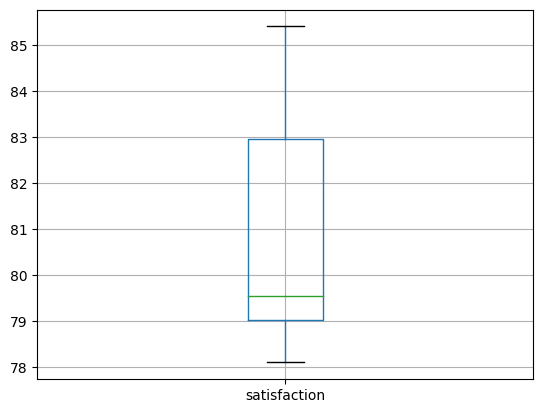

In [30]:
df.boxplot()

In [31]:
# satisfaction 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['satisfaction'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = 0.8473218074095161, p-value = 0.05397528806783875


In [32]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 78.0)
t_result
# stats.ttest_1samp(df, 평균)
# 한 집단 평균 검정

TtestResult(statistic=array([3.37924492]), pvalue=array([0.00813672]), df=array([9]))

In [33]:
# 1-sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-Sample t-tset")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

# 결론 : 유의수준 5%에서 검정결과 P값이 0.008므로 개선활동이 고객만족도 변화를 시켰다고 할 수 없다

1-Sample t-tset
t 통계량 : [3.379]
p-value : [0.008]


In [34]:
# p302 실습
# 추론 통계 (2 sample t-test) :, 두 집단 간 평균이 같은지 비교
# 제품을 A공급자와 B공급자로 부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다.
# 공급자 간에 모평균에 차이가 있다고 할 수 있는가? (유의수준 a = 0.05)

dfa = pd.DataFrame({'A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344], 'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.800]})
dfa

,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457
5,1.832,1.548
6,1.427,1.404
7,1.344,1.800


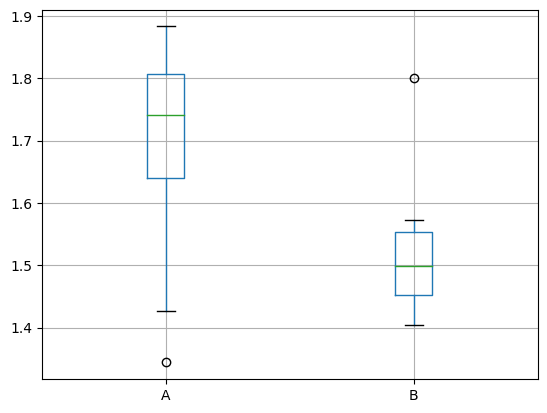

In [35]:
# group 별 boxplot
dfa.boxplot(['A', 'B'])
plt.show()

In [36]:
# 'A', 'B' 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(dfa['A'])
print("statistic = {}, p-value={}".format(statistic, p))

statistic = 0.8425755349628155, p-value=0.08004540790335968


In [37]:
statistic, p = stats.shapiro(dfa['B'])
print("statistic = {}, p-value={}".format(statistic, p))

statistic = 0.8393933531403902, p-value=0.07424861689729985


In [38]:
stats.bartlett(dfa['A'], dfa['B'])
# 등분산성 검정

BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

In [39]:
# 두 집단 간 평균이 같은지 비교
# 2-sample t-test
t_result = stats.ttest_ind(dfa['A'], dfa['B'])
t_result

TtestResult(statistic=1.94021417939838, pvalue=0.07276790080849707, df=14.0)

In [40]:
# 2-sample t-test의 t값 p값 저장 및 출력
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-sample t_test")
print("t: {}".format(t))
print("p: {}".format(p))

# 결론 : 유의수준 5%에서 검정결과 P값이 0.073이므로 고객간에 고객만족도의 차이가 있다.

2-sample t_test
t: 1.94
p: 0.073


In [41]:
# p305 실습
# 추론 통계 (paired t-test) : 짝을 이루는 집단의 평균의 차이가 있는지 검정
# 회사원 10명에 대해 영어점수가 학원가기 저/후에 영어점수가 짝을 이루고 있다.
# 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라. (유의수준 a = 0.05)

df1 = pd.DataFrame({'before' : [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after' : [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

In [42]:
# paired t-test
t_result =stats.ttest_rel(df1, df2)
t_result

TtestResult(statistic=array([-2.26606522]), pvalue=array([0.04968162]), df=array([9]))

In [43]:
# paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("Paired t-test")
print("t: {}".format(t))
print("t: {}".format(p))

# 결론 : 유의수준 5%에서 검정결과 p값이 0.005 이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.

Paired t-test
t: [-2.266]
t: [0.05]


In [44]:
# p310 실습
# 추론 통계 (1 proportion test)
# 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 
# 이 동전은 정상인가를 유의수준 a = 0.05로써 검정하라. 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다.

count = 40 # 앞면이 나온 수
n_obs = 100 # 100번 던짐
value = 0.5 # 정상 앞면 확률

z, p = proportions_ztest(count, n_obs, value)
print("1 Proportion test")
print('z: {0:0.3f}'.format(z))
print('p: {0:0.3f}'.format(p))

# 결론 : 결과적으로 기존 동전 정상 비율 대비 차이가 있다고 할 수 없다.

1 Proportion test
z: -2.041
p: 0.041


In [45]:
# p313 실습
# 추론 통계 (2 proportion test)
# 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
# 두 공정의 불량률이 같다고 할 수 있는가? (유의수준 a = 0.05)
# → 공장 A : N1 = 1200, X1 = 14
# → 공장 B : N2 = 1200, X2 = 5

count = np.array([14, 5])
nobs = np.array([1200, 1200])

z, p = proportions_ztest(count ,nobs)
print("2 Proportion test")
print('z: {0:0.3f}'.format(z))
print('p: {0:0.3f}'.format(p))

# 결론 : P-value < 0.05 이므로 두 공장의 불량률은 차이가 있다.

2 Proportion test
z: 2.073
p: 0.038


In [46]:
# p321 실습
# 추론 통계 (카이제곱 검정, chi-square test)
# 노트북 컴퓨터의 6가지 제품(A, B, C, D, E, F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록
# 32명의 소비자를 대상으로 설문 조사한 Table이다. 
# 각 제품에 대해 이미지에 대해 차이가 있겠는가? (유의수준 0.05)

df = pd.DataFrame({'A': [18, 1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4], 'C': [4, 1, 3, 4, 9, 5, 4], 'D': [4, 1, 2, 3, 2, 7, 3], 'E': [3, 1, 3, 1, 1, 1, 1], 'F' : [3, 25, 8, 10, 2, 1, 7]})
df

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2
5,9,9,5,7,1,1
6,10,4,4,3,1,7


In [47]:
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)
print("chi-square test")
print('chisq : {0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

# 결론 : 유의수준 5%에서 근무조별로 제품을 생산하는 부하 차이가 없다고 할 수 있다.

chi-square test
chisq : 98.274
p:0.000
degree pf freedom: 30
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


In [48]:
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771], 'B': [721, 721, 910, 678, 723, 790, 711, 790, 745, 891], 'C': [750, 915, 888, 721, 894, 834, 841, 912, 845, 889]})
df

,A,B,C
0,892,721,750
1,623,721,915
2,721,910,888
3,678,678,721
4,723,723,894
5,790,790,834
6,720,711,841
7,670,790,912
8,690,745,845
9,771,891,889


In [49]:
# p328 실습
# 추론 통계 (ANOVA)
# 철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데, 
# 강종별로 2차 정련시간의 차이가 있는지와 type별로 2차정련 시간에 차이가 있는지 검정하라 
# (유의수준 0.05) (data set : ANOVA.csv)

ano = pd.read_csv("/home/piai/다운로드/2주차 실습파일/1 Big Data 분석 기초/ANOVA.csv")
ano


,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


In [50]:
ano_A = ano.loc[ano.gangjong == 'a', ['time', 'charge', 'gangjong']]
ano_A

,time,charge,gangjong
0,32.2,A,a
1,30.4,B,a
2,33.6,C,a
3,36.4,D,a
4,33.9,E,a
5,34.9,F,a


In [51]:
ano_B = ano.loc[ano.gangjong == 'b', ['time', 'charge', 'gangjong']]
ano_B

,time,charge,gangjong
6,33.1,A,b
7,29.9,B,b
8,31.7,C,b
9,27.5,D,b
10,34.0,E,b
11,30.7,F,b


In [52]:
ano_C = ano.loc[ano.gangjong == 'c', ['time', 'charge', 'gangjong']]
ano_C

,time,charge,gangjong
12,32.6,A,c
13,32.7,B,c
14,29.3,C,c
15,25.9,D,c
16,31.1,E,c
17,23.8,F,c


In [53]:
ano_D = ano.loc[ano.gangjong == 'd', ['time', 'charge', 'gangjong']]
ano_D

,time,charge,gangjong
18,26.7,A,d
19,28.5,B,d
20,30.9,C,d
21,26.2,D,d
22,32.3,E,d
23,23.7,F,d


In [54]:
# 강종별 time 정규성 검정 : shapiro-Wilk Test

statistic, p = stats.shapiro(ano_A['time'])
print("statistic={}, p-vaule={}".format(statistic, p))

statistic, p = stats.shapiro(ano_B['time'])
print("statistic={}, p-vaule={}".format(statistic, p))

statistic, p = stats.shapiro(ano_C['time'])
print("statistic={}, p-vaule={}".format(statistic, p))

statistic, p = stats.shapiro(ano_D['time'])
print("statistic={}, p-vaule={}".format(statistic, p))


statistic=0.9879402484638727, p-vaule=0.9835576371370772
statistic=0.9769708531514716, p-vaule=0.9355481069537137
statistic=0.8929418389400074, p-vaule=0.33388968261479385
statistic=0.9713903657895416, p-vaule=0.901640794517041


In [55]:
# 강종별 time 등분산성 검정 : bartlett Test
stats.bartlett(ano_A['time'], ano_B['time'], ano_C['time'], ano_D['time'])

BartlettResult(statistic=1.8729084232387967, pvalue=0.5991991808067023)

In [56]:
# ANOVA 실행
f_result = stats.f_oneway(ano_A['time'], ano_B['time'], ano_C['time'], ano_D['time'])
f_result

F_onewayResult(statistic=4.171868041291934, pvalue=0.019013221784198356)

In [57]:
# ANOVA의 값 f값 p값 저장
f, p = f_result.statistic.round(3), f_result.statistic.round(3)
print("One-way ANOVA")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

# 결론 : 유의수준 5%에서 p_value가 4.172이므로 강종별로 2차 정련시간의 차이가 있다고 할 수 있다.

One-way ANOVA
F 통계량: 4.172
p-value: 4.172


In [58]:
# type 별 2차정련 시간 차이
ano_E = ano.loc[ano.type == 'a', ['time', 'charge', 'type']]
ano_E

,time,charge,type
0,32.2,A,a
1,30.4,B,a
2,33.6,C,a
3,36.4,D,a
4,33.9,E,a
5,34.9,F,a
6,33.1,A,a
7,29.9,B,a
8,31.7,C,a
9,27.5,D,a


In [59]:
ano_F = ano.loc[ano.type == 'b', ['time', 'charge', 'type']]
ano_F

,time,charge,type
12,32.6,A,b
13,32.7,B,b
14,29.3,C,b
15,25.9,D,b
16,31.1,E,b
17,23.8,F,b
18,26.7,A,b
19,28.5,B,b
20,30.9,C,b
21,26.2,D,b


In [60]:
# type 별 time 정규성 검정 : shapiro-Wilk Test

statistic, p = stats.shapiro(ano_E['time'])
print("statistic={}, p-vaule={}".format(statistic, p))

statistic, p = stats.shapiro(ano_F['time'])
print("statistic={}, p-vaule={}".format(statistic, p))

statistic=0.9821396890860578, p-vaule=0.9907690420937295
statistic=0.909827276366793, p-vaule=0.2122626774616082


In [61]:
# TYPE 별 time 등분산성 검정 : bartlett Test
stats.bartlett(ano_E['time'], ano_F['time'])

BartlettResult(statistic=0.9529700642151171, pvalue=0.3289644435379069)

In [62]:
# ANOVA 실행
f_result = stats.f_oneway(ano_E['time'], ano_F['time'])
f_result

F_onewayResult(statistic=9.653815948538297, pvalue=0.005139574956672389)

In [63]:
# ANOVA의 값 f값 p값 저장
f, p = f_result.statistic.round(3), f_result.statistic.round(3)
print("One-way ANOVA")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

# 결론 : 유의수준 5%에서 p_value가 9.654므로 type별로 2차 정련시간의 차이가 있다고 할 수 있다.

One-way ANOVA
F 통계량: 9.654
p-value: 9.654


In [64]:
# p333 실습
# 추론 통계 (correlation analysis)
# 초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요

df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

# 결론 : 초코칩의 강도와 재료 반죽온도 간에  약한 상관성이 있다고 할 수 있다.

Correlation Analysis
corr:-0.723
p-value:0.000
